<ipython-input-11-5e2afdce005e>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Array 1: (0, 1, 2, 3, 4)
Array 2: (0, 1, 2, 4, 3)
Array 3: (0, 1, 3, 2, 4)
Array 4: (0, 1, 3, 4, 2)
Array 5: (0, 1, 4, 2, 3)
Array 6: (0, 1, 4, 3, 2)
Array 7: (0, 2, 1, 3, 4)
Array 8: (0, 2, 1, 4, 3)
Array 9: (0, 2, 3, 1, 4)
Array 10: (0, 2, 3, 4, 1)
Array 11: (0, 2, 4, 1, 3)
Array 12: (0, 2, 4, 3, 1)
Array 13: (0, 3, 1, 2, 4)
Array 14: (0, 3, 1, 4, 2)
Array 15: (0, 3, 2, 1, 4)
Array 16: (0, 3, 2, 4, 1)
Array 17: (0, 3, 4, 1, 2)
Array 18: (0, 3, 4, 2, 1)
Array 19: (0, 4, 1, 2, 3)
Array 20: (0, 4, 1, 3, 2)
Array 21: (0, 4, 2, 1, 3)
Array 22: (0, 4, 2, 3, 1)
Array 23: (0, 4, 3, 1, 2)
Array 24: (0, 4, 3, 2, 1)
Array 25: (1, 0, 2, 3, 4)
Array 26: (1, 0, 2, 4, 3)
Array 27: (1, 0, 3, 2, 4)
Array 28: (1, 0, 3, 4, 2)
Array 29: (1, 0, 4, 2, 3)
Array 30: (1, 0, 4, 3, 2)
Array 31: (1, 2, 0, 3, 4)
Array 32: (1, 2, 0, 4, 3)
Array 33: (1, 2, 3, 0, 4)
Array 34: (1, 2, 3, 4, 0)
Array 35: (1, 2, 4, 0, 3)
Array 36: (1, 2, 4, 3, 0)
Array 37: (1, 3, 0, 2, 4)
Array 38: (1, 3, 0, 4, 2)
Array 39: (1, 3, 2, 0

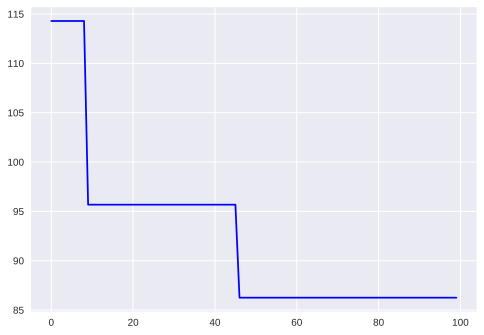

[0, 2, 3, 1, 4]


In [ ]:


import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

%config InlineBackend.figure_format = 'svg'

plt.style.use("seaborn")

np.random.seed(42)

cities = [0, 1, 2, 3, 4]

from itertools import permutations


cities = [0, 1, 2, 3, 4]


all_arrays = list(permutations(cities, 5))


for i, arr in enumerate(all_arrays):

    print(f"Array {i+1}: {arr}")


adjacency_mat = np.asarray(

    [

        [0.00, 28.02, 17.12, 27.46, 46.07],

        [28.02, 0.00, 34.00, 25.55, 25.55],

        [17.12, 34.00, 0.00, 18.03, 57.38],

        [27.46, 25.55, 18.03, 0.00, 51.11],

        [46.07, 25.55, 57.38, 51.11, 0.00],

    ]

)


class Population():

    def __init__(self, bag, adjacency_mat):

        self.bag = bag

        self.parents = []

        self.score = 0

        self.best = None

        self.adjacency_mat = adjacency_mat


def init_population(cities, adjacency_mat, n_population):

    return Population(

        np.asarray([np.random.permutation(cities) for _ in range(n_population)]),

        adjacency_mat

    )


pop = init_population(cities, adjacency_mat, 5)


def fitness(self, chromosome):

    return sum(

        [

            self.adjacency_mat[chromosome[i], chromosome[i + 1]]

            for i in range(len(chromosome) - 1)

        ]

    )


Population.fitness = fitness


def evaluate(self):

    distances = np.asarray(

        [self.fitness(chromosome) for chromosome in self.bag]

    )

    self.score = np.min(distances)

    self.best = self.bag[distances.tolist().index(self.score)]

    self.parents.append(self.best)

    if False in (distances[0] == distances):

        distances = np.max(distances) - distances

    return distances / np.sum(distances)


Population.evaluate = evaluate


print(pop.evaluate())


print(pop.best)

print(pop.score)


def select(self, k=4):

    fit = self.evaluate()

    while len(self.parents) < k:

        idx = np.random.randint(0, len(fit))

        if fit[idx] > np.random.rand():

            self.parents.append(self.bag[idx])

    self.parents = np.asarray(self.parents)


Population.select = select

print(pop.select())

print(pop.parents)


# Mutation

def swap(chromosome):

    a, b = np.random.choice(len(chromosome), 2)

    chromosome[a], chromosome[b] = (

        chromosome[b],

        chromosome[a],

    )

    return chromosome


def cyclic_crossover(parent1, parent2):

    size = len(parent1)

    child = [-1] * size

    cycle_start = np.random.randint(size)

    while True:

        child[cycle_start] = parent1[cycle_start]

        cycle_index = np.where(parent2 == parent1[cycle_start])[0][0]

        while cycle_index != cycle_start:

            child[cycle_index] = parent1[cycle_index]

            cycle_index = np.where(parent2 == parent1[cycle_index])[0][0]

        # Find the next cycle

        cycle_start = next((i for i, x in enumerate(child) if x == -1), None)

        if cycle_start is None:

            break

    return child


def crossover(self, p_cross=0.1):

    children = []

    count, size = self.parents.shape

    for _ in range(len(self.bag)):

        if np.random.rand() > p_cross:

            children.append(

                list(self.parents[np.random.randint(count, size=1)[0]])

            )

        else:

            parent1, parent2 = self.parents[

                np.random.randint(count, size=2), :

            ]

            child = cyclic_crossover(parent1, parent2)

            children.append(child)

    return children


Population.crossover = crossover


def mutate(self, p_cross=0.1, p_mut=0.1):

    next_bag = []

    children = self.crossover(p_cross)

    for child in children:

        if np.random.rand() < p_mut:

            next_bag.append(swap(child))

        else:

            next_bag.append(child)

    return next_bag


Population.mutate = mutate

pop.mutate()


def genetic_algorithm(

    cities,

    adjacency_mat,

    n_population=5,

    n_iter=20,

    selectivity=0.15,

    p_cross=0.5,

    p_mut=0.1,

    print_interval=100,

    return_history=False,

    verbose=False,

):

    pop = init_population(cities, adjacency_mat, n_population)

    best = pop.best

    score = float("inf")

    history = []

    for i in range(n_iter):

        pop.select(n_population * selectivity)

        history.append(pop.score)

        if verbose:

            print(f"Generation {i}: {pop.score}")

        elif i % print_interval == 0:

            print(f"Generation {i}: {pop.score}")

        if pop.score < score:

            best = pop.best

            score = pop.score

        children = pop.mutate(p_cross, p_mut)

        pop = Population(children, pop.adjacency_mat)

    if return_history:

        return best, history

    return best


genetic_algorithm(cities, adjacency_mat, verbose=True)


best, history = genetic_algorithm(

    cities,

    adjacency_mat,

    n_iter=100,

    verbose=False,

    print_interval=20,

    return_history=True,

)


plt.plot(range(len(history)), history, color="blue")

plt.show()

print(best)